# Visualization with Matplotlib

Matplotlib (www.matplotlib.org) is the standard plotting library for Python. It is very powerful for customized, high-quality 2D graphics and plays well with the notebook. It is not so strong for 3D and interactive web-based visualizations. 

The import convention is as follows:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-notebook")

Each matplotlib plot consists of a figure and axes (aka. subfigures).

In [ ]:
fig = plt.figure()
ax = plt.axes()

In Matplotlib, the *figure* (an instance of the class ``plt.Figure``) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class ``plt.Axes``) is what we see above: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization.
Throughout this book, we'll commonly use the variable name ``fig`` to refer to a figure instance, and ``ax`` to refer to an axes instance or group of axes instances.

Once we have created an axes, we can use the ``ax.plot`` function to plot some data. Let's start with a simple sinusoid:

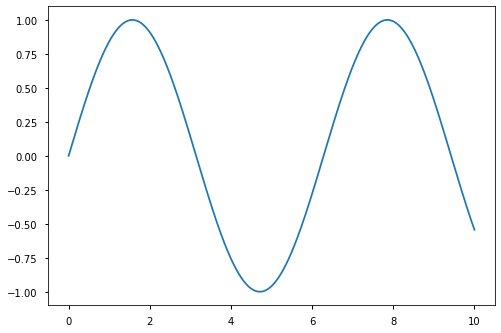

In [10]:
fig, ax = plt.subplots()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

The approach just described can become quite tedious when creating a large grid of subplots, especially if you'd like to hide the x- and y-axis labels on the inner plots.
For this purpose, ``plt.subplots()`` is the easier tool to use (note the ``s`` at the end of ``subplots``). Rather than creating a single subplot, this function creates a full grid of subplots in a single line, returning them in a NumPy array.
The arguments are the number of rows and number of columns, along with optional keywords ``sharex`` and ``sharey``, which allow you to specify the relationships between different axes.

Here we'll create a $2 \times 3$ grid of subplots, where all axes in the same row share their y-axis scale, and all axes in the same column share their x-axis scale:

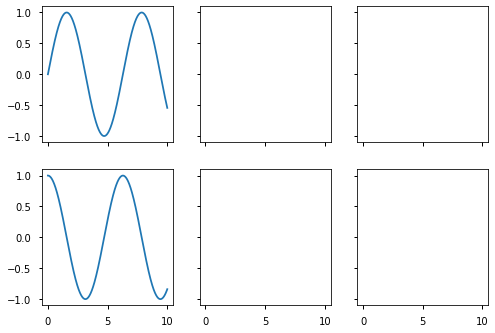

In [14]:
fig, ax = plt.subplots(2,3, sharey=True, sharex=True)
ax[0,0].plot(x, np.sin(x))
ax[1,0].plot(x, np.cos(x))

In [12]:
ax

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [ ]:
ax.shape

In [ ]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

In [ ]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

# A complete example of a figure

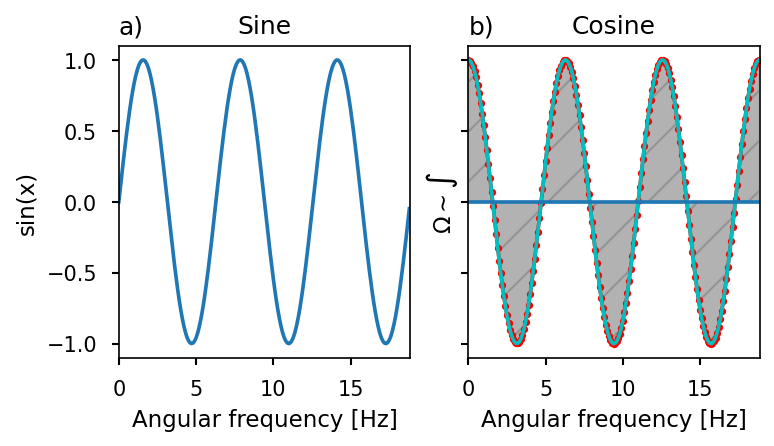

In [15]:
x = np.arange(0, 6 * np.pi, 0.1)

fig, axes = plt.subplots(1, 2, figsize=(14 / 2.54, 7 / 2.54), sharey=True, dpi=150)

ax = axes[0]
ax.plot(x, np.sin(x))
ax.set_xlabel('Angular frequency [Hz]')
ax.set_ylabel('sin(x)')
ax.set_title('Sine')

ax = axes[1]
ax.plot(x, np.cos(x), '.-', color='r')

ax.plot(x, np.sin(x + np.pi / 2.0), color='c')

ax.axhline(y=0)

ax.fill_between(x,
    y1=x * 0,
    y2=np.cos(x),
    hatch='/',
    alpha=0.6,
    color='gray',
)
ax.set_xlabel('Angular frequency [Hz]')
ax.set_ylabel('$\Omega \sim \int$')
ax.set_title('Cosine')

for ax, label in zip(axes, "ab"):
    ax.set_xlim(0, 6 * np.pi)
    ax.set_title(label + ")", loc="left")
    
fig.savefig("myfigure.pdf")

# Customization is endless, if you know the [anatomy of a figure](https://matplotlib.org/gallery/showcase/anatomy.html?highlight=anatomy%20figure)

![anatomy](https://matplotlib.org/_images/anatomy.png)